In [ ]:
import torch

In [ ]:
!pip install opencv-python

In [ ]:
import sklearn

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import zipfile
import os
from google.colab import files

# Upload the zip file
uploaded = files.upload()

# Get the filename of the uploaded file
zip_filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Set the paths using the uploaded filename
zip_path = "/content/" + zip_filename
extract_path = "/content/brain_tumor_dataset"

# Extract the files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files:", os.listdir(extract_path))

Saving archive (15).zip to archive (15).zip
Extracted files: ['brain_tumor_dataset', 'yes', 'no']


In [ ]:
import os
print(os.listdir('/content/brain_tumor_dataset/'))  # List the contents of the dataset folder

['brain_tumor_dataset', 'yes', 'no']


In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import random
import cv2
import sys

In [ ]:
import os

dataset_path = "/content/brain_tumor_dataset"  # Adjust if mounted from Google Drive

for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)


Directory: /content/brain_tumor_dataset
Subdirectories: ['brain_tumor_dataset', 'yes', 'no']
Files: []
----------------------------------------
Directory: /content/brain_tumor_dataset/brain_tumor_dataset
Subdirectories: ['yes', 'no']
Files: []
----------------------------------------
Directory: /content/brain_tumor_dataset/brain_tumor_dataset/yes
Subdirectories: []
Files: ['Y242.JPG', 'Y20.jpg', 'Y22.jpg', 'Y148.JPG', 'Y114.JPG', 'Y194.jpg', 'Y100.JPG', 'Y252.jpg', 'Y24.jpg', 'Y112.JPG', 'Y170.JPG', 'Y98.JPG', 'Y184.JPG', 'Y115.JPG', 'Y11.jpg', 'Y156.JPG', 'Y158.JPG', 'Y183.jpg', 'Y41.jpg', 'Y99.JPG', 'Y13.jpg', 'Y59.JPG', 'Y251.JPG', 'Y164.JPG', 'Y58.JPG', 'Y186.jpg', 'Y92.png', 'Y154.jpg', 'Y77.jpg', 'Y61.jpg', 'Y256.JPG', 'Y104.jpg', 'Y161.JPG', 'Y116.JPG', 'Y40.JPG', 'Y111.JPG', 'Y79.jpg', 'Y53.jpg', 'Y250.jpg', 'Y76.jpg', 'Y90.jpg', 'Y102.jpg', 'Y28.jpg', 'Y45.JPG', 'Y18.JPG', 'Y2.jpg', 'Y37.jpg', 'Y25.jpg', 'Y69.jpg', 'Y50.JPG', 'Y195.JPG', 'Y257.jpg', 'Y73.jpg', 'Y51.jpg', 'Y55.

In [ ]:
import glob

image_files = glob.glob(dataset_path + "/**/*", recursive=True)
print("Total files found:", len(image_files))

for file in image_files[:10]:  # Print first 10 files
    print(file)


Total files found: 511
/content/brain_tumor_dataset/brain_tumor_dataset
/content/brain_tumor_dataset/yes
/content/brain_tumor_dataset/no
/content/brain_tumor_dataset/brain_tumor_dataset/yes
/content/brain_tumor_dataset/brain_tumor_dataset/no
/content/brain_tumor_dataset/brain_tumor_dataset/yes/Y242.JPG
/content/brain_tumor_dataset/brain_tumor_dataset/yes/Y20.jpg
/content/brain_tumor_dataset/brain_tumor_dataset/yes/Y22.jpg
/content/brain_tumor_dataset/brain_tumor_dataset/yes/Y148.JPG
/content/brain_tumor_dataset/brain_tumor_dataset/yes/Y114.JPG


In [ ]:
!ls "/content/drive/My Drive/brain_tumor_dataset/yes"


ls: cannot access '/content/drive/My Drive/brain_tumor_dataset/yes': No such file or directory


In [ ]:
!ls -l /content/brain_tumor_dataset


total 12
drwxr-xr-x 4 root root 4096 Feb 24 23:32 brain_tumor_dataset
drwxr-xr-x 2 root root 4096 Feb 24 23:32 no
drwxr-xr-x 2 root root 4096 Feb 24 23:32 yes


In [ ]:
import os
print(os.path.exists('/content/brain_tumor_dataset'))
print(os.path.exists('/content/brain_tumor_dataset/brain_tumor_dataset'))


True
True


In [ ]:
!chmod -R 755 /content/brain_tumor_dataset


In [ ]:
!ls -la /content/brain_tumor_dataset


total 20
drwxr-xr-x 5 root root 4096 Feb 24 23:32 .
drwxr-xr-x 1 root root 4096 Feb 24 23:32 ..
drwxr-xr-x 4 root root 4096 Feb 24 23:32 brain_tumor_dataset
drwxr-xr-x 2 root root 4096 Feb 24 23:32 no
drwxr-xr-x 2 root root 4096 Feb 24 23:32 yes


In [ ]:
%cd /content/brain_tumor_dataset
!ls


/content/brain_tumor_dataset
brain_tumor_dataset  no  yes


In [ ]:
import os

dataset_path = "/content/brain_tumor_dataset"

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):  # Ensure it's a directory
        print(f"{category}: {len(os.listdir(category_path))} images")


brain_tumor_dataset: 2 images
yes: 155 images
no: 98 images


In [ ]:
import glob
import cv2

# Define your custom dataset path here
dataset_path = "/content/brain_tumor_dataset"

# Lists to store images
yes = []
no = []

# Loop over the "yes" category images (tumor images)
for f in glob.iglob(f"/content/brain_tumor_dataset/yes/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128,128))

    b, g, r = cv2.split(img) #r,g, and b is used for AI models to identify different patterns in the images.
    img = cv2.merge([r, g, b])
    yes.append(img)
    print(f"Loaded tumor image: {f}")  # Print the filename of each tumor image

# Loop over the "no" category images (healthy images)
for f in glob.iglob(f"/content/brain_tumor_dataset/no/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128,128))

    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    no.append(img)
    print(f"Loaded healthy image: {f}")  # Print the filename of each healthy image


Loaded tumor image: /content/brain_tumor_dataset/yes/Y20.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y22.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y194.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y252.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y24.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y11.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y183.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y41.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y13.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y186.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y154.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y77.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y61.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y104.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y79.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y53.jpg
Loaded tumor image

In [ ]:
for img in yes:
  print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [ ]:
yes = np.array(yes)
no = np.array(no)
ALL = np.concatenate((yes, no))


In [ ]:
yes.shape

(86, 128, 128, 3)

In [ ]:
no.shape

(85, 128, 128, 3)

In [ ]:
ALL.shape

(171, 128, 128, 3)

In [ ]:
155+98

253

In [ ]:
yes.shape

(86, 128, 128, 3)

In [ ]:
np.random.choice(10,5,replace = False)

array([5, 7, 6, 2, 4])

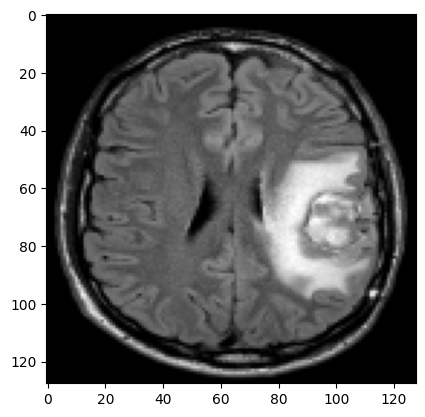

In [ ]:
#Visualizing Brain MRI Images
plt.imshow(yes[0]) # Pass the image data, not its shape
plt.show() # To display the image

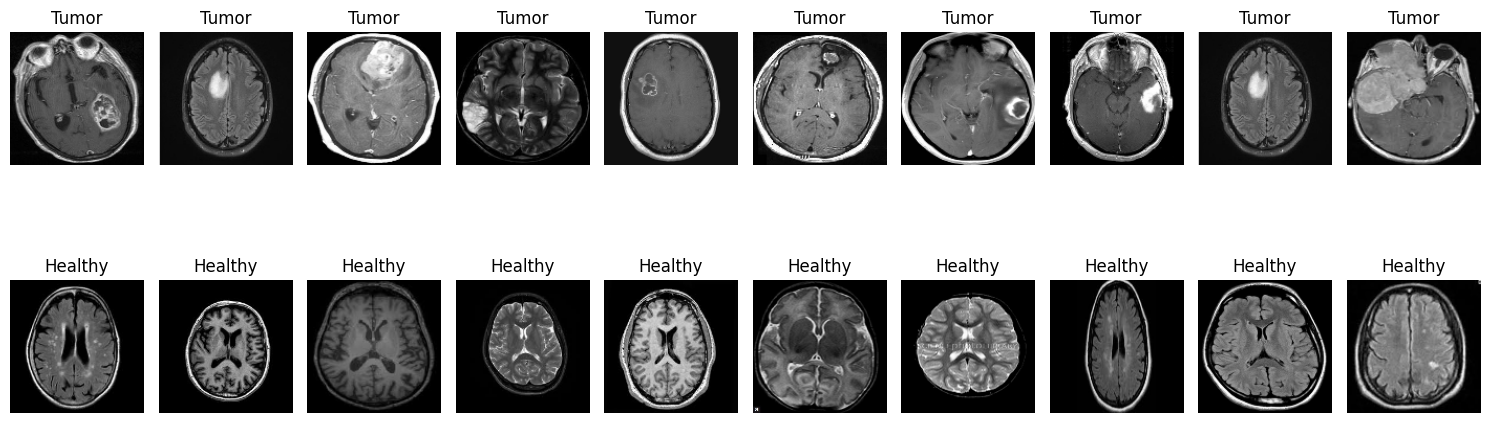

In [ ]:
import random
import matplotlib.pyplot as plt

def plot_random(yes, no, max):
    """Plots a random selection of images from the 'yes' and 'no' datasets.

    Args:
        yes: NumPy array containing 'yes' images.
        no: NumPy array containing 'no' images.
        max: Maximum number of images to plot.
    """

    num_yes = min(max, len(yes))
    num_no = min(max, len(no))

    # Randomly select indices for 'yes' images
    yes_indices = random.sample(range(len(yes)), num_yes)

    # Randomly select indices for 'no' images
    no_indices = random.sample(range(len(no)), num_no)

    # Create subplots
    fig, axes = plt.subplots(2, max, figsize=(15, 6))

    # Plot 'yes' images
    for i, index in enumerate(yes_indices):
        axes[0, i].imshow(yes[index])
        axes[0, i].set_title("Tumor")
        axes[0, i].axis("off")

    # Plot 'no' images
    for i, index in enumerate(no_indices):
        axes[1, i].imshow(no[index])
        axes[1, i].set_title("Healthy")
        axes[1, i].axis("off")

    plt.tight_layout()
    plt.show()

#Assuming 'yes' and 'no' are defined as in your previous code snippets:
#yes = np.array(...) #Your code to load 'yes' images
#no = np.array(...) #Your code to load 'no' images

# Now call the plot_random function:
plot_random(yes, no, max=10)

In [ ]:
class Dataset(object):
    """An abstract class representing a Dataset.

    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])

In [ ]:
class MRI(Dataset):
    def __init__(self): # No additional arguments besides 'self' are needed here

        # Use different variable names to store the lists and arrays
        yes_list = []  # Store 'yes' images in a list
        no_list = []   # Store 'no' images in a list

        # Loop over the "yes" category images (tumor images)
        for f in glob.iglob(f"/content/brain_tumor_dataset/yes/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img, (128, 128))

            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            yes_list.append(img)  # Append to the list
            print(f"Loaded tumor image: {f}")

        # Loop over the "no" category images (healthy images)
        for f in glob.iglob(f"/content/brain_tumor_dataset/no/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img, (128, 128))

            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            no_list.append(img)  # Append to the list
            print(f"Loaded healthy image: {f}")

        # Convert lists to NumPy arrays after loading is complete
        yes = np.array(yes_list, dtype=np.float32)
        no = np.array(no_list, dtype=np.float32)

        # our labels
        yes_labels = np.ones(yes.shape[0])
        no_labels = np.zeros(no.shape[0])

        # Concatenates
        self.images = np.concatenate((yes, no), axis=0)
        self.labels = np.concatenate((no_labels, yes_labels))

    def __len__(self):
        return self.images.shape[0]

    def __getitem__(self, index):
        sample = {"image": self.images[index], "label": self.labels[index]}
        return sample

    def normalize(self):
        self.images = self.images / 255.0

In [ ]:
mri = MRI()

Loaded tumor image: /content/brain_tumor_dataset/yes/Y20.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y22.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y194.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y252.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y24.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y11.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y183.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y41.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y13.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y186.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y154.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y77.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y61.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y104.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y79.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y53.jpg
Loaded tumor image

In [ ]:
d = MRI()
d2 = MRI()

Loaded tumor image: /content/brain_tumor_dataset/yes/Y20.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y22.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y194.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y252.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y24.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y11.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y183.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y41.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y13.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y186.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y154.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y77.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y61.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y104.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y79.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y53.jpg
Loaded tumor image

In [ ]:
mri[5]

{'image': array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]], dtype=float32),
 'label': 0.0}

In [ ]:
mri_dataset = MRI()
mri_dataset.normalize()

Loaded tumor image: /content/brain_tumor_dataset/yes/Y20.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y22.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y194.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y252.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y24.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y11.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y183.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y41.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y13.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y186.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y154.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y77.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y61.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y104.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y79.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y53.jpg
Loaded tumor image

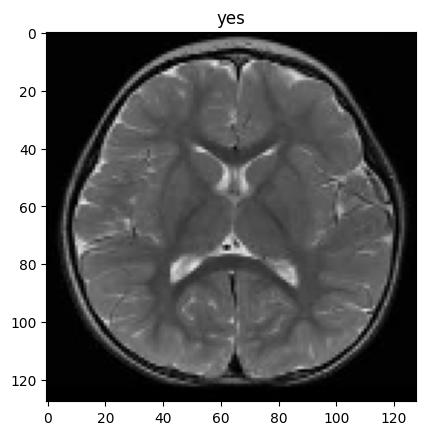

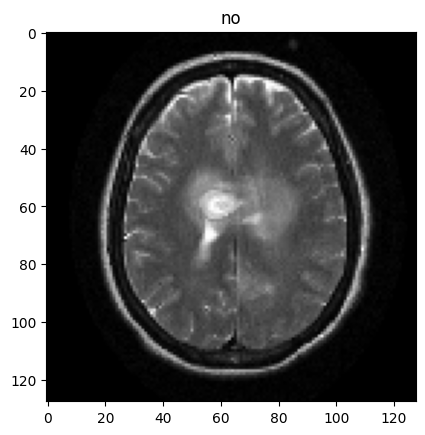

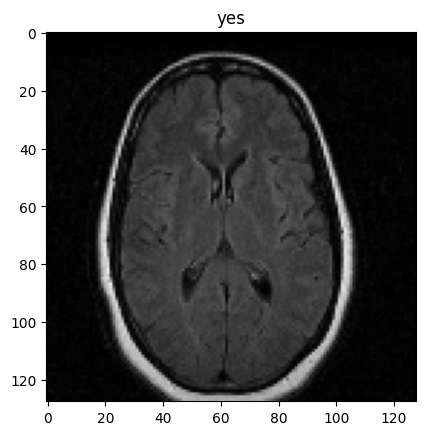

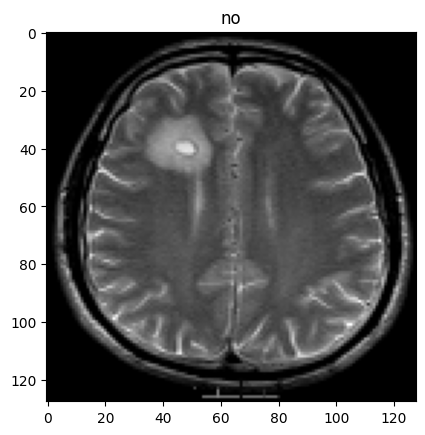

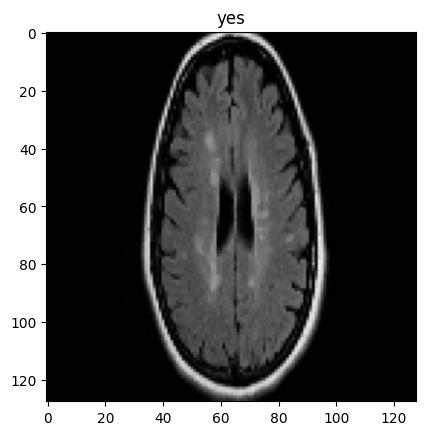

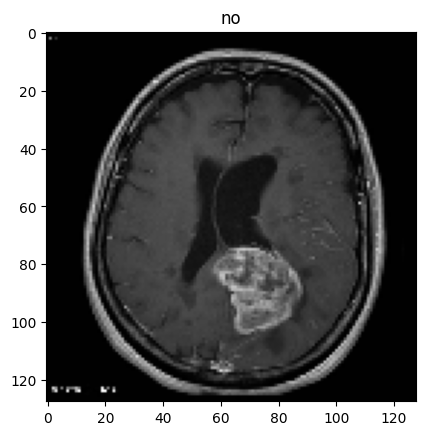

In [ ]:
names = {0:"no", 1:"yes"}
dataloader = DataLoader(mri_dataset, shuffle = True)
for i , sample in enumerate(dataloader):
  img = sample['image'].squeeze()
  # The color channel should be the last dimension, if it's not already
  if img.shape[0] == 3 and img.shape[1] != 3 and img.shape[2] != 3:  # Check if color channel is first
    img = img.permute(1, 2, 0)  # Change the order of dimensions only if necessary

  plt.title(names[sample['label'].item()])
  plt.imshow(img)
  plt.show()
  if i == 5:
    break

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5), # This layer expects 3 input channels
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5))

        self.fc_model = nn.Sequential(
        nn.Linear(in_features=256, out_features=120),
        nn.Tanh(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84, out_features=1))

    def forward(self, x):
        # Permute the dimensions to [batch_size, channels, height, width]
        x = x.permute(0, 3, 1, 2)
        x = self.cnn_model(x)
        # Use reshape() instead of view() to handle non-contiguous tensors
        x = x.reshape(x.size(0), -1)  # Change this line
        x = self.fc_model(x)
        x = F.sigmoid(x)
        return x # Add a return statement to return the output

In [ ]:
model = CNN()

In [ ]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [ ]:
model.cnn_model

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): Tanh()
  (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Tanh()
  (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
)

In [ ]:
model.cnn_model[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
model.cnn_model[0].weight.shape

torch.Size([6, 3, 5, 5])

In [ ]:
#Linear Layer
model.fc_model

Sequential(
  (0): Linear(in_features=256, out_features=120, bias=True)
  (1): Tanh()
  (2): Linear(in_features=120, out_features=84, bias=True)
  (3): Tanh()
  (4): Linear(in_features=84, out_features=1, bias=True)
)

In [ ]:
model.fc_model[0].weight.shape

torch.Size([120, 256])

In [ ]:
#evaluate a new born nueral network
mri_dataset = MRI()
mri_dataset.normalize()
device = torch.device('cuda:0')
model = CNN().to(device)


Loaded tumor image: /content/brain_tumor_dataset/yes/Y20.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y22.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y194.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y252.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y24.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y11.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y183.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y41.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y13.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y186.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y154.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y77.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y61.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y104.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y79.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y53.jpg
Loaded tumor image

In [ ]:
dataloader = DataLoader(mri_dataset, batch_size = 32, shuffle = False)


In [ ]:
model.eval()
outputs = []
y_true = []

with torch.no_grad():
   for D in dataloader:
    image = D['image'].to(device)
    Label = D['label'].to(device)

    y_hat = model(image)
    outputs.append(y_hat.cpu().detach().numpy())
    y_true.append(Label.cpu().detach().numpy())


In [ ]:
outputs = np.concatenate(outputs, axis = 0).squeeze()
y_true = np.concatenate(y_true, axis = 0).squeeze()


In [ ]:
def threshold(scores, threshold = 0.50, minimum = 0, maximum = 1.0):
  x = np.array(list(scores))
  x[x >= threshold] = maximum
  x[x < threshold] = minimum
  return x

In [ ]:
accuracy_score(y_true, threshold(outputs))

0.5029239766081871

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

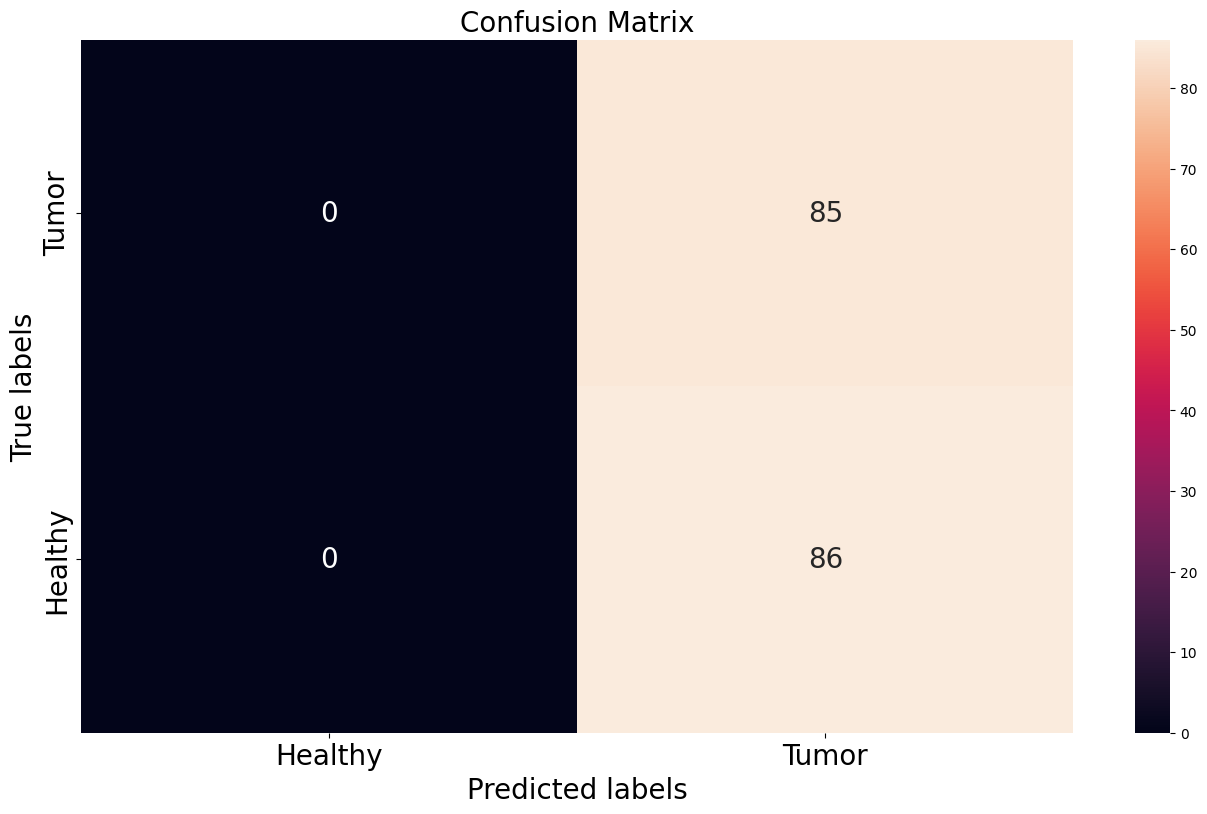

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size": 20})

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['Healthy','Tumor'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor','Healthy'], fontsize=20)

In [ ]:
eta = 0.001
epochs = 400
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
dataloader = DataLoader(mri_dataset, batch_size = 32, shuffle = True)
model.train()

# Initialize lists to store epoch losses
epoch_train_loss = []
epoch_val_loss = []

In [ ]:
for epoch in range(1,600):
    train_losses = []
    # train for the current epoch
    model.train()
    # mri_dataset.mode = 'train'  # Remove this line if 'mode' is not an attribute of your dataset
    for D in dataloader:
        # Train the model
        optimizer.zero_grad()
        data = D['image'].to(device, dtype=torch.float32) # Explicitly cast to float32
        label = D['label'].to(device, dtype=torch.float32) # Explicitly cast to float32

        y_hat = model(data)
        error = nn.BCELoss()
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    epoch_train_loss.append(np.mean(train_losses))

    # validate for the current epoch
    val_losses = []
    model.eval()

    # mri_dataset.mode = 'val'  # Remove this line if 'mode' is not an attribute of your dataset

    with torch.no_grad():
        for D in dataloader:
            data = D['image'].to(device, dtype=torch.float32) # Explicitly cast to float32
            label = D['label'].to(device, dtype=torch.float32) # Explicitly cast to float32
            y_hat = model(data)
            error = nn.BCELoss()
            loss = torch.sum(error(y_hat.squeeze(), label))
            val_losses.append(loss.item())

    epoch_val_loss.append(np.mean(val_losses))

    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tTrain Loss: {:.6f}\tVal Loss: {:.6f}'.format(epoch+1, np.mean(train_losses),np.mean(val_losses)))

Train Epoch: 10	Train Loss: 0.557459	Val Loss: 0.537840
Train Epoch: 20	Train Loss: 0.340479	Val Loss: 0.318553
Train Epoch: 30	Train Loss: 0.133727	Val Loss: 0.272336
Train Epoch: 40	Train Loss: 0.041745	Val Loss: 0.031077
Train Epoch: 50	Train Loss: 0.052602	Val Loss: 0.032852
Train Epoch: 60	Train Loss: 0.024956	Val Loss: 0.015512
Train Epoch: 70	Train Loss: 0.013525	Val Loss: 0.010748
Train Epoch: 80	Train Loss: 0.054883	Val Loss: 0.009939
Train Epoch: 90	Train Loss: 0.011430	Val Loss: 0.010155
Train Epoch: 100	Train Loss: 0.015321	Val Loss: 0.008755
Train Epoch: 110	Train Loss: 0.010250	Val Loss: 0.010150
Train Epoch: 120	Train Loss: 0.014371	Val Loss: 0.016521
Train Epoch: 130	Train Loss: 0.012367	Val Loss: 0.009010
Train Epoch: 140	Train Loss: 0.011093	Val Loss: 0.016770
Train Epoch: 150	Train Loss: 0.030395	Val Loss: 0.030899
Train Epoch: 160	Train Loss: 0.022581	Val Loss: 0.011135
Train Epoch: 170	Train Loss: 0.015198	Val Loss: 0.010613
Train Epoch: 180	Train Loss: 0.020546	Va

In [ ]:
model.eval()
outputs = []
y_true = []

with torch.no_grad():
   for D in dataloader:
    image = D['image'].to(device)
    Label = D['label'].to(device)

    y_hat = model(image)
    outputs.append(y_hat.cpu().detach().numpy())
    y_true.append(Label.cpu().detach().numpy())

outputs = np.concatenate(outputs, axis = 0)
y_true = np.concatenate(y_true, axis = 0)

In [ ]:
accuracy_score(y_true, threshold(outputs))

0.9941520467836257

In [ ]:
no_of_layers = 0
conv_layers = []


In [ ]:
model_children = list(model.children()) #Let's assume the conv layer name as children


In [ ]:
model_children = list(model.children()) #Let's assume the conv layer name as children

no_of_layers = 0  # Initialize no_of_layers before the loop
conv_layers = []  # Initialize conv_layers before the loop

for child in model_children:  #This checks what's inside each layer
  if type(child) == nn.Sequential:
    for layer in child.children():
      if type(layer) == nn.Conv2d:
        no_of_layers += 1
        conv_layers.append(layer)

In [ ]:
conv_layers

[Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1)),
 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))]

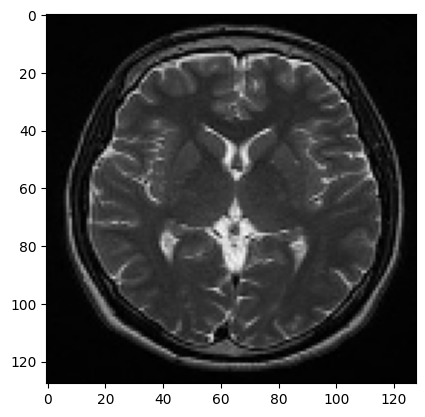

In [ ]:
img = mri_dataset[100]['image']
plt.imshow(img.reshape(128,128,3))

In [ ]:
img = torch.from_numpy(img).to(device)

In [ ]:
img = img.unsqueeze(0)
img.shape

torch.Size([1, 128, 128, 3])

In [ ]:
mri_dataset = MRI()
mri_dataset.normalize()
mri_dataset.train_val_split()

Loaded tumor image: /content/brain_tumor_dataset/yes/Y20.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y22.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y194.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y252.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y24.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y11.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y183.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y41.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y13.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y186.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y154.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y77.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y61.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y104.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y79.jpg
Loaded tumor image: /content/brain_tumor_dataset/yes/Y53.jpg
Loaded tumor image

AttributeError: 'MRI' object has no attribute 'train_val_split'